In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# scikit-learn
import sklearn

# ÏàòÏπòÌòï Î≥ÄÌôò
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# PCA (Ï∞®Ïõê Ï∂ïÏÜå : Ï£ºÏÑ±Î∂ÑÎ∂ÑÏÑù)
from sklearn.decomposition import PCA

# Î¨∏Ï†úÏßÄ, ÎãµÏïàÏßÄ Î∂ÑÎ¶¨
from sklearn.model_selection import train_test_split

# ÌöåÍ∑Ä Î™®Îç∏ (+ ÌÜµÍ≥Ñ)
# from sklearn.linear_model import LogisticRegression --> Î∂ÑÎ•ò Î™®Îç∏ / ÌöåÍ∑Ä XXXXXXXX
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ïô∏Î∂Ä(Google) ÌöåÍ∑ÄÎ™®Îç∏ (+ Î≥ÑÎèÑÏÑ§Ïπò )
# import xgboost as xgb
# import lightgbm as lgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Ï†ïÍ∑úÌôî / Ïä§ÏºÄÏùºÎü¨
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ÍµêÏ∞® Í≤ÄÏ¶ù : StratifiedKFold (yÎ•º Í≥†Î•¥Í≤å Ìè¥ÎìúÏóê Î∂ÑÎ∞∞ÌïúÎã§Îäî Í≤ÉÏùÄ ÌöåÍ∑ÄÏóêÏÑú ÏóÜÎã§) 
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

# ÌöåÍ∑Ä ÌèâÍ∞Ä Îß§Ìä∏Î¶≠Ïä§
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import StackingRegressor

# matplotlib Ï∞®Ìä∏ Ïä§ÌÉÄÏùºÏùÑ seaborn Ïä§ÌÉÄÏùºÎ°ú ÏÑ§Ï†ï
sns.set()

# ----------- Ï∞®Ìä∏ Í¥ÄÎ†® ÏÜçÏÑ± (ÌïúÍ∏ÄÏ≤òÎ¶¨, Í∑∏Î¶¨Îìú) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- Ï£ºÌîºÌÑ∞ , Ï∂úÎ†•Í≤∞Í≥º ÎÑìÏù¥ ÎäòÎ¶¨Í∏∞ ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [35]:
df = pd.read_csv('../data/train.csv')
df.head(5)

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [36]:
df = df.drop('id', axis=1)
df.columns = ['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm']
df.head()

rs         al        vc        aq        is       lpl        ms  \
0  0.603610  -7.636942  0.023500  0.000005  0.000001  0.051385  0.409866   
1  0.639451 -16.267598  0.071520  0.444929  0.349414  0.170522  0.651010   
2  0.514538 -15.953575  0.110715  0.173699  0.453814  0.029576  0.423865   
3  0.734463  -1.357000  0.052965  0.001651  0.159717  0.086366  0.278745   
4  0.532968 -13.056437  0.023500  0.068687  0.000001  0.331345  0.477769   

           tdm         e        bpm  
0  290715.6450  0.826267  147.53020  
1  164519.5174  0.145400  136.15963  
2  174495.5667  0.624667   55.31989  
3  225567.4651  0.487467  147.91212  
4  213960.6789  0.947333   89.58511

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rs      524164 non-null  float64
 1   al      524164 non-null  float64
 2   vc      524164 non-null  float64
 3   aq      524164 non-null  float64
 4   is      524164 non-null  float64
 5   lpl     524164 non-null  float64
 6   ms      524164 non-null  float64
 7   tdm     524164 non-null  float64
 8   e       524164 non-null  float64
 9   bpm     524164 non-null  float64
dtypes: float64(10)
memory usage: 40.0 MB


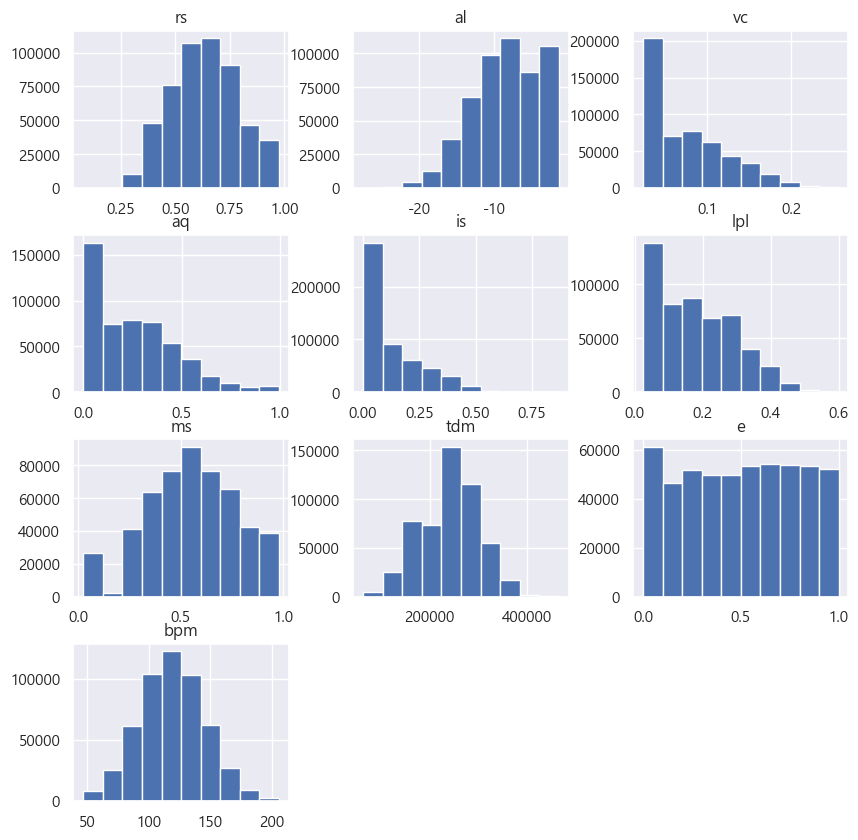

In [5]:
df.hist(figsize=(10, 10))
plt.show()

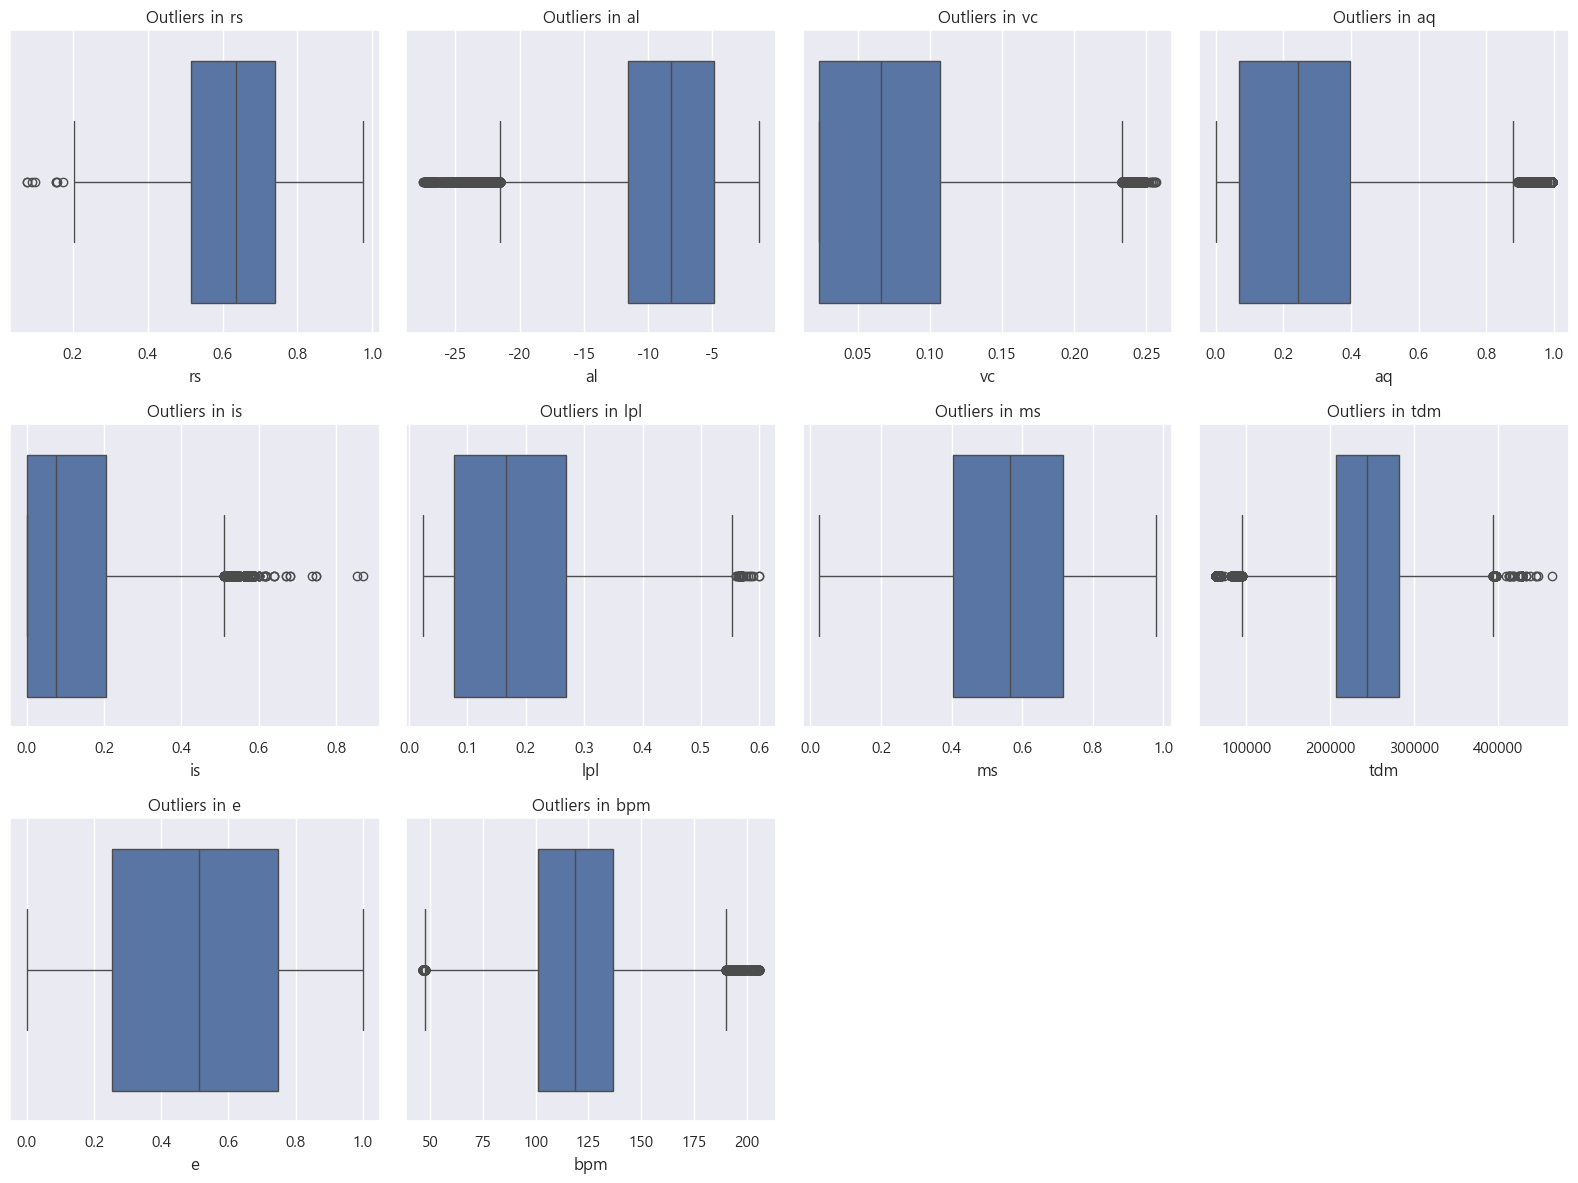

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Î∂ÑÏÑùÌï† Ïà´ÏûêÌòï ÌäπÏÑ±Îì§ ÏÑ†ÌÉù
# ÏòàÏãú: dfÍ∞Ä Ïù¥ÎØ∏ ÏûàÍ≥†, Î™®Îì† Ïó¥Ïù¥ Ïà´ÏûêÌòïÏù¥ÎùºÍ≥† Í∞ÄÏ†ï
# num_features = df.columns
num_features = df.select_dtypes(include=np.number).columns.tolist()


# 1. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞ÏôÄ Í≤©Ïûê(grid) ÏÑ§Ï†ï
n_features = len(num_features)
n_cols = 4  # Ìïú Ï§ÑÏóê Í∑∏Î¶¥ Í∑∏ÎûòÌîÑÏùò Í∞úÏàò (ÏõêÌïòÎäî ÎåÄÎ°ú Ï°∞Ï†à)
n_rows = math.ceil(n_features / n_cols) # ÌïÑÏöîÌïú Ï§ÑÏùò Í∞úÏàò ÏûêÎèô Í≥ÑÏÇ∞

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Îã§Î£®Í∏∞ ÏâΩÍ≤å Ìï®

# 2. forÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å subplotÏóê boxplot Í∑∏Î¶¨Í∏∞
for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. ÎÇ®Îäî Îπà subplotÎì§ÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùÑ Î≥¥Í∏∞ Ï¢ãÍ≤å Ï°∞Ï†ïÌïòÍ≥† Ï∂úÎ†•
plt.tight_layout()
plt.show()

In [7]:
# IQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò Ìñâ ÏÇ≠Ï†ú ÏΩîÎìú

import pandas as pd
import numpy as np

# 1. ÏõêÎ≥∏ DataFrameÏùÑ ÏïàÏ†ÑÌïòÍ≤å Î≥µÏÇ¨
df_trimmed = df.copy()

# 2. Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï† Ïà´ÏûêÌòï ÌäπÏÑ±(feature)Îì§Ïùò Î¶¨Ïä§Ìä∏
# ÏòàÏãú: num_features = ['age', 'income', 'score']
# Ïù¥ Î¶¨Ïä§Ìä∏Îäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.
num_features = df_trimmed.select_dtypes(include=np.number).columns.tolist()

# 3. Í∞Å Ïà´ÏûêÌòï ÌäπÏÑ±Ïóê ÎåÄÌï¥ Ïù¥ÏÉÅÏπò Ìñâ ÏÇ≠Ï†ú
for col in num_features:
    Q1 = df_trimmed[col].quantile(0.25)
    Q3 = df_trimmed[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ï†ïÏÉÅ Î≤îÏúÑÏóê ÏûàÎäî ÌñâÎßå ÎÇ®ÍπÄ
    df_trimmed = df_trimmed[(df_trimmed[col] >= lower_bound) & (df_trimmed[col] <= upper_bound)]

# 4. Í≤∞Í≥º ÌôïÏù∏
print("Original DataFrame Shape:", df.shape)
print("Trimmed DataFrame Shape:", df_trimmed.shape)

Original DataFrame Shape: (524164, 10)
Trimmed DataFrame Shape: (505206, 10)


In [40]:
# IQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò ÎåÄÏ≤¥(Winsorization) ÏΩîÎìú

import pandas as pd
import numpy as np

# 1. ÏõêÎ≥∏ DataFrameÏùÑ ÏïàÏ†ÑÌïòÍ≤å Î≥µÏÇ¨
df_winsorized = df.copy()

# 2. Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï† Ïà´ÏûêÌòï ÌäπÏÑ±(feature)Îì§Ïùò Î¶¨Ïä§Ìä∏
# Ïù¥ Î¶¨Ïä§Ìä∏Îäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.
num_features = df_winsorized.select_dtypes(include=np.number).columns.tolist()

# 3. Î≥µÏÇ¨Î≥∏(df_winsorized)Ïùò Ïù¥ÏÉÅÏπòÎ•º Í≤ΩÍ≥ÑÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
for col in num_features:
    Q1 = df_winsorized[col].quantile(0.25)
    Q3 = df_winsorized[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Winsorization (capping)
    df_winsorized[col] = np.where(df_winsorized[col] < lower_bound, lower_bound,
                                  np.where(df_winsorized[col] > upper_bound, upper_bound, df_winsorized[col]))

# 4. Í≤∞Í≥º ÌôïÏù∏
print("Original DataFrame Shape:", df.shape)
print("Winsorized DataFrame Shape:", df_winsorized.shape)
# df_winsorized.describe() # Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌñàÎäîÏßÄ ÌôïÏù∏

Original DataFrame Shape: (524164, 10)
Winsorized DataFrame Shape: (524164, 10)


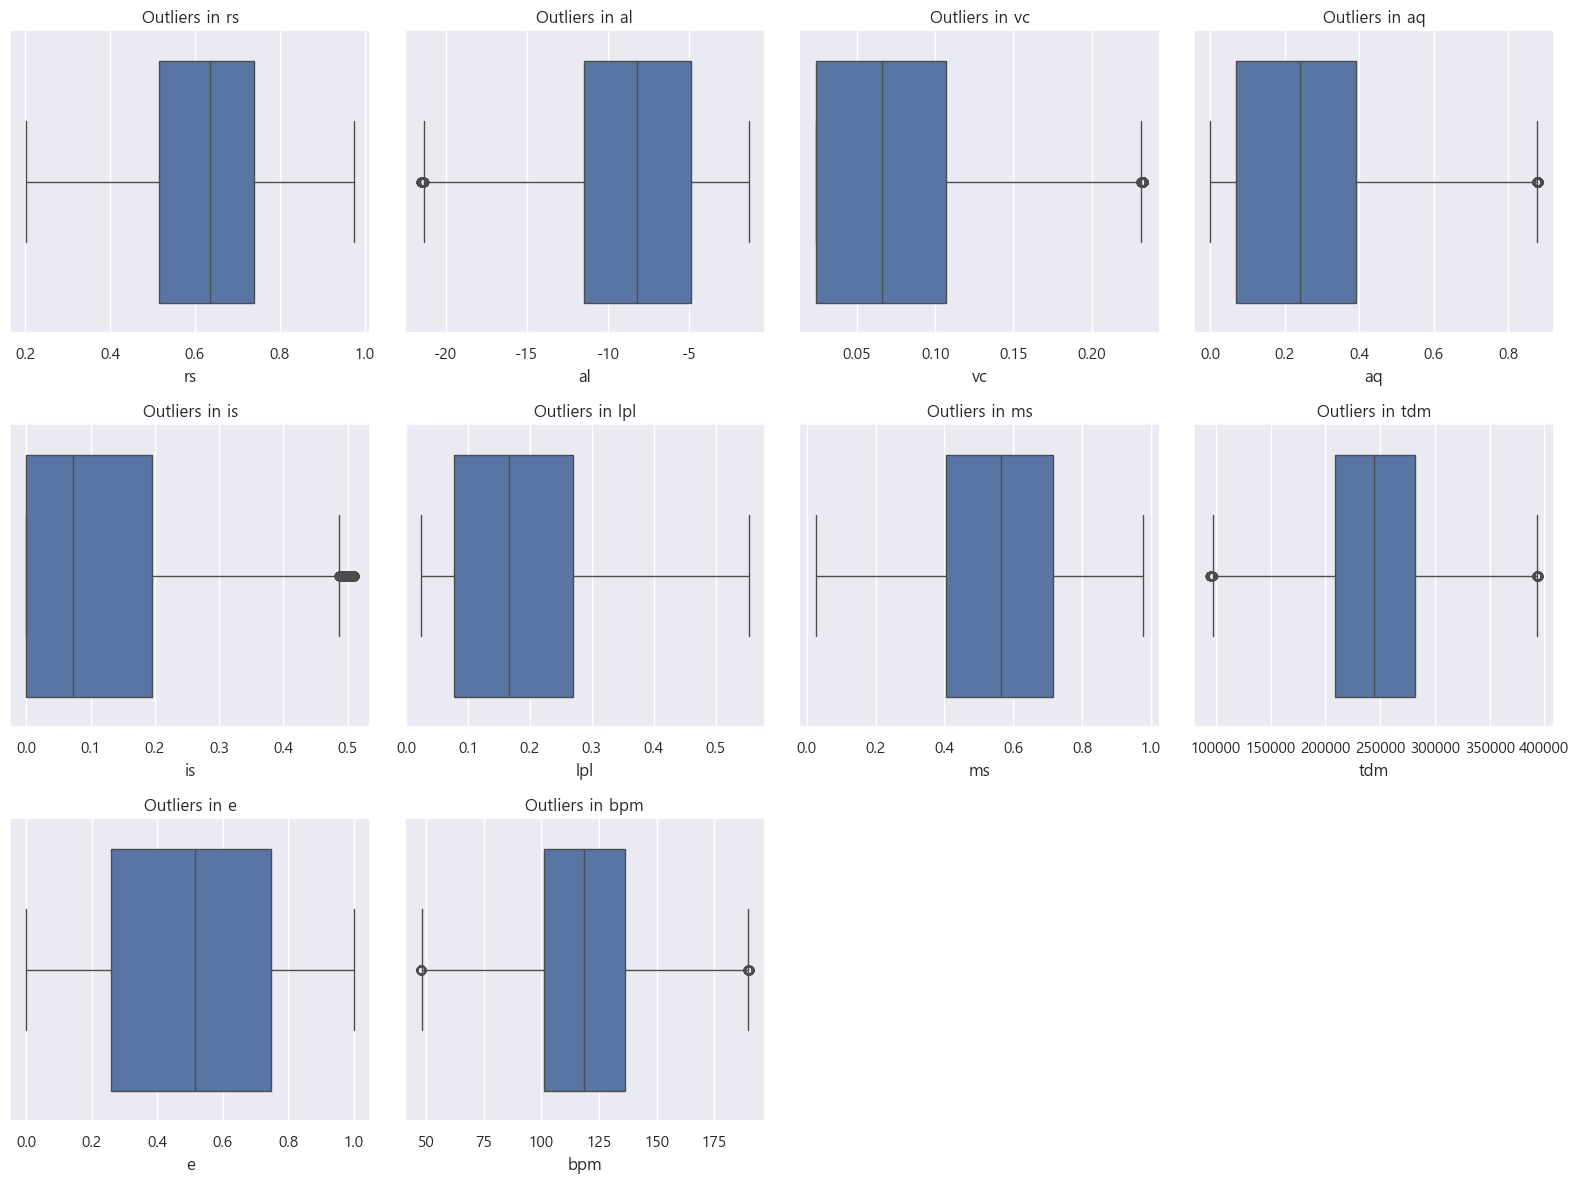

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Î∂ÑÏÑùÌï† Ïà´ÏûêÌòï ÌäπÏÑ±Îì§ ÏÑ†ÌÉù
# ÏòàÏãú: dfÍ∞Ä Ïù¥ÎØ∏ ÏûàÍ≥†, Î™®Îì† Ïó¥Ïù¥ Ïà´ÏûêÌòïÏù¥ÎùºÍ≥† Í∞ÄÏ†ï
# num_features = df.columns
num_features = df_trimmed.select_dtypes(include=np.number).columns.tolist()


# 1. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞ÏôÄ Í≤©Ïûê(grid) ÏÑ§Ï†ï
n_features = len(num_features)
n_cols = 4  # Ìïú Ï§ÑÏóê Í∑∏Î¶¥ Í∑∏ÎûòÌîÑÏùò Í∞úÏàò (ÏõêÌïòÎäî ÎåÄÎ°ú Ï°∞Ï†à)
n_rows = math.ceil(n_features / n_cols) # ÌïÑÏöîÌïú Ï§ÑÏùò Í∞úÏàò ÏûêÎèô Í≥ÑÏÇ∞

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Îã§Î£®Í∏∞ ÏâΩÍ≤å Ìï®

# 2. forÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å subplotÏóê boxplot Í∑∏Î¶¨Í∏∞
for i, col in enumerate(num_features):
    sns.boxplot(x=df_trimmed[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. ÎÇ®Îäî Îπà subplotÎì§ÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùÑ Î≥¥Í∏∞ Ï¢ãÍ≤å Ï°∞Ï†ïÌïòÍ≥† Ï∂úÎ†•
plt.tight_layout()
plt.show()

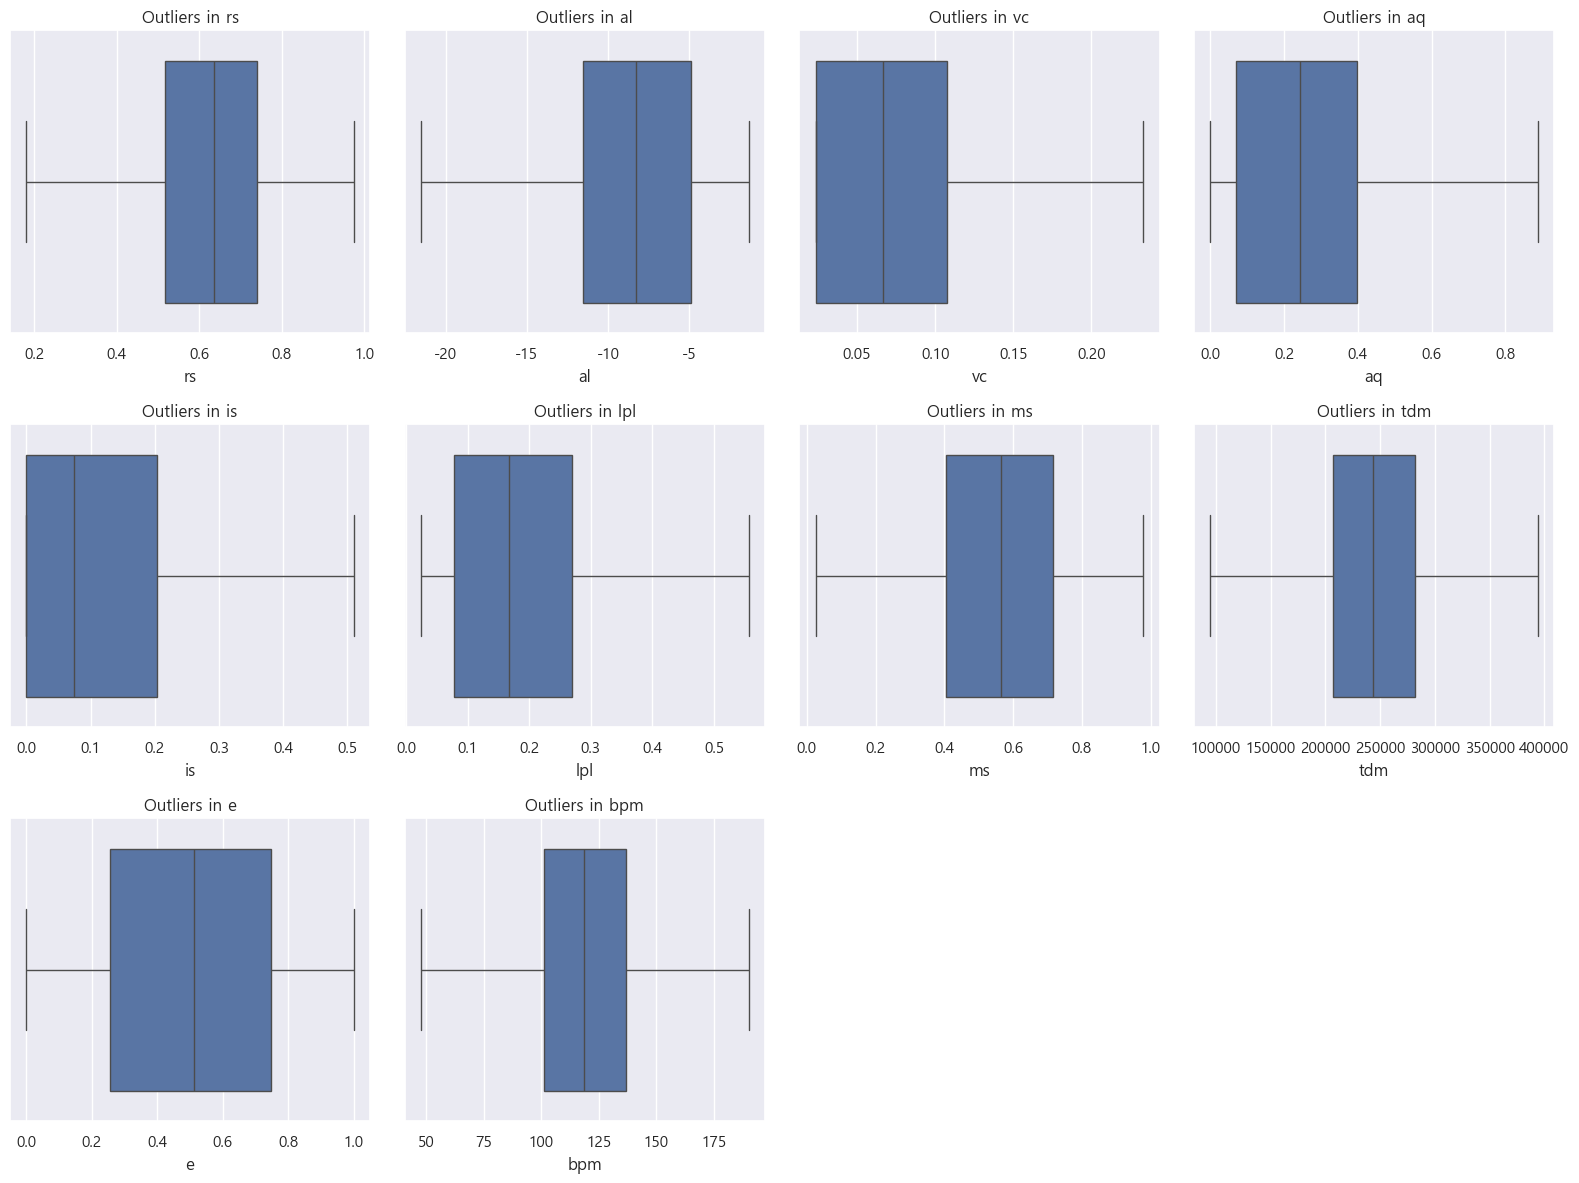

In [41]:
num_features = df_winsorized.select_dtypes(include=np.number).columns.tolist()


# 1. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞ÏôÄ Í≤©Ïûê(grid) ÏÑ§Ï†ï
n_features = len(num_features)
n_cols = 4  # Ìïú Ï§ÑÏóê Í∑∏Î¶¥ Í∑∏ÎûòÌîÑÏùò Í∞úÏàò (ÏõêÌïòÎäî ÎåÄÎ°ú Ï°∞Ï†à)
n_rows = math.ceil(n_features / n_cols) # ÌïÑÏöîÌïú Ï§ÑÏùò Í∞úÏàò ÏûêÎèô Í≥ÑÏÇ∞

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Îã§Î£®Í∏∞ ÏâΩÍ≤å Ìï®

# 2. forÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å subplotÏóê boxplot Í∑∏Î¶¨Í∏∞
for i, col in enumerate(num_features):
    sns.boxplot(x=df_winsorized[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. ÎÇ®Îäî Îπà subplotÎì§ÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùÑ Î≥¥Í∏∞ Ï¢ãÍ≤å Ï°∞Ï†ïÌïòÍ≥† Ï∂úÎ†•
plt.tight_layout()
plt.show()

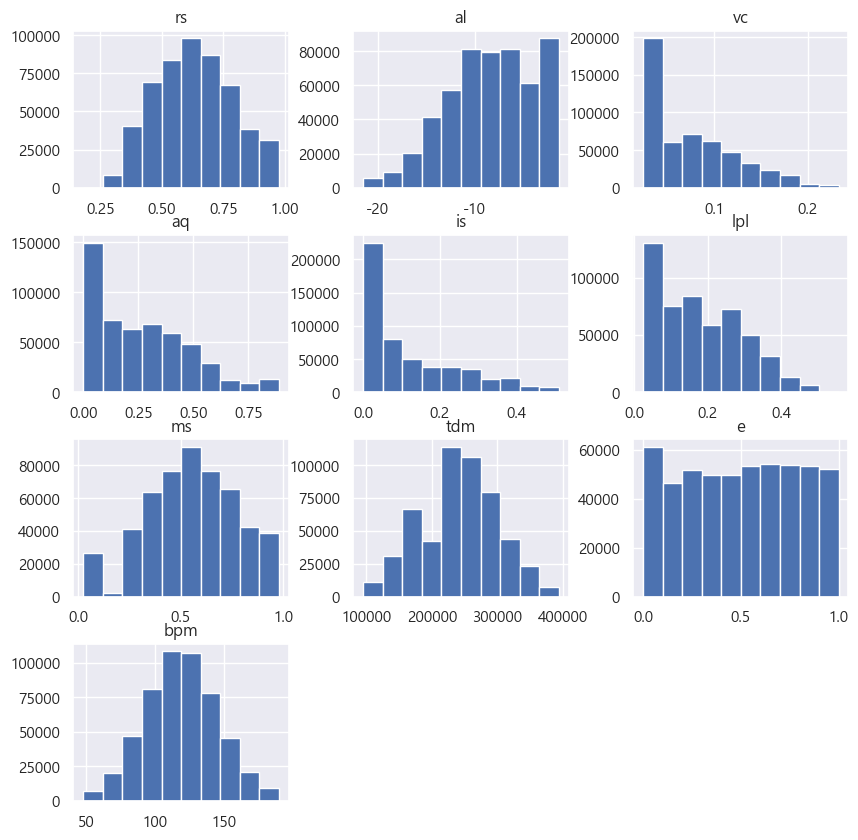

In [42]:
dfw = df_winsorized
dfw.hist(figsize=(10, 10))
plt.show()

# ÌååÏù¥ÌîÑ ÎùºÏù∏

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

In [43]:
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)

from scipy.stats import skew,  kurtosis
s = pd.Series( skew(X) , index=X.columns)
k = pd.Series( kurtosis(X), index=X.columns)
print(s,'\n',k)

rs     0.168312
al    -0.277784
vc     0.784150
aq     0.683496
is     1.015470
lpl    0.392639
ms    -0.268819
tdm   -0.117443
e     -0.030343
dtype: float64 
 rs    -0.527269
al    -0.508426
vc    -0.170850
aq    -0.150533
is     0.054721
lpl   -0.757076
ms    -0.142285
tdm   -0.344598
e     -1.209077
dtype: float64


In [44]:
X80,X20,y80,y20 = train_test_split(X, y, test_size=0.2, random_state=8989)
X80.shape, y80.shape, X20.shape, y20.shape

((419331, 9), (419331,), (104833, 9), (104833,))

In [45]:
model = XGBRegressor()

model.fit(X80,y80)
pred = model.predict(X20)
mse = mean_squared_error(y20, pred)
print(mse)

700.2772193345596


In [46]:
tran_pipe = TransformedTargetRegressor (
                Pipeline([ ('my_log1p', FunctionTransformer(np.log1p, validate=True)), 
                           ('my_scaler', StandardScaler()),
                           ('my_model', XGBRegressor())
                       ]),
                func=np.log1p, 
                inverse_func=np.expm1
)
tran_pipe.fit(X80, y80)
pred = tran_pipe.predict(X20)
#############  pred = np.expm1(pred_log)
mse = mean_squared_error(y20, pred)
print(mse)

709.5900445148106


In [47]:
dfw.columns

Index(['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm'], dtype='object')

In [18]:
# Î°úÍ∑∏ Î≥ÄÌôò ÎåÄÏÉÅ
log_features = ['vc', 'aq', 'is']

# 1Ô∏è‚É£ ÌîºÏ≤ò Î≥ÄÌôò ÌååÏù¥ÌîÑÎùºÏù∏
feature_pipe = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), log_features),
    ('pass', 'passthrough', [col for col in X80.columns if col not in log_features])
])

# 2Ô∏è‚É£ Ï†ÑÏ≤¥ Î™®Îç∏ ÌååÏù¥ÌîÑÎùºÏù∏
model = Pipeline([
    ('feature_pipe', feature_pipe),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

# 3Ô∏è‚É£ ÌÉÄÍπÉ Î°úÍ∑∏Î≥ÄÌôò + Ïó≠Î≥ÄÌôò ÏûêÎèô Ï†ÅÏö©
tran_pipe = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

# 4Ô∏è‚É£ ÌïôÏäµ
tran_pipe.fit(X80, y80)

# 5Ô∏è‚É£ ÏòàÏ∏° (inverse ÏûêÎèô Ï†ÅÏö©Îê®)
pred = tran_pipe.predict(X20)

# 6Ô∏è‚É£ ÌèâÍ∞Ä
mse = mean_squared_error(y20, pred)
print("MSE:", mse)

MSE: 709.7010217300203


In [19]:
# Î°úÍ∑∏ Ïä§ÏºÄÏùºÎü¨ Î≥ÄÌôò ÌõÑ mse Í∞í Ïò§ÌûàÎ†§ ÏïàÏ¢ãÏïÑÏ°åÍ∏∞Ïóê Ï†úÏô∏

In [48]:
# ====================================
# 2Ô∏è‚É£ Base models (XGB + LGBM)
# ====================================
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',  # ‚úÖ GPU ÌïôÏäµ
    predictor='gpu_predictor'
)

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    device='gpu'
)

# ====================================
# 3Ô∏è‚É£ Meta model (stacking layer)
# ====================================
# Î≥¥ÌÜµ Í∞ÑÎã®Ìïú RidgeÎÇò LinearRegression ÏÇ¨Ïö©
meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))
#ÌõÑÎ≥¥ alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# ====================================
# 4Ô∏è‚É£ Stacking Regressor
# ====================================
stack_model = StackingRegressor(
    estimators=[
        ("xgb", xgb),
        ("lgbm", lgbm)
    ],
    final_estimator=meta_model,
    passthrough=False,  # base Î™®Îç∏ ÏûÖÎ†•ÏùÑ meta modelÏóê Ï∂îÍ∞ÄÌï†ÏßÄ Ïó¨Î∂Ä
    n_jobs=-1
)

# ====================================
# 6Ô∏è‚É£ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
# ====================================
stack_model.fit(X80, y80)
pred = stack_model.predict(X20)

mse = mean_squared_error(y20, pred)
print("Stacking MSE:", mse)
print("Stacking RMSE:", rmse)

Stacking MSE: 694.5066184186078
Stacking RMSE: 26.356493784734894


# ÌîºÏ≥ê Ï∂îÍ∞Ä

In [21]:
dfw['tdM'] = dfw['tdm'] / 60000
dfw['ear'] = dfw['e'] / (df['aq'] + 1e-5)
dfw['vib'] = dfw['vc'] / (df['is'] + 1e-5)
dfw['mr'] = dfw['ms'] * df['rs']
dfw['pi'] = dfw['lpl'] * df['al']
dfw['re'] = dfw['rs'] * df['e']
dfw['ma'] = dfw['ms'] * df['aq']

In [22]:
dfw.head()

rs         al        vc        aq        is       lpl        ms  \
0  0.603610  -7.636942  0.023500  0.000005  0.000001  0.051385  0.409866   
1  0.639451 -16.267598  0.071520  0.444929  0.349414  0.170522  0.651010   
2  0.514538 -15.953575  0.110715  0.173699  0.453814  0.029576  0.423865   
3  0.734463  -1.357000  0.052965  0.001651  0.159717  0.086366  0.278745   
4  0.532968 -13.056437  0.023500  0.068687  0.000001  0.331345  0.477769   

           tdm         e        bpm       tdM           ear          vib  \
0  290715.6450  0.826267  147.53020  4.845261  53793.402799  2122.854562   
1  164519.5174  0.145400  136.15963  2.741992      0.326786     0.204678   
2  174495.5667  0.624667   55.31989  2.908259      3.596060     0.243959   
3  225567.4651  0.487467  147.91212  3.759458    293.506628     0.331594   
4  213960.6789  0.947333   89.58511  3.566011     13.790031  2122.854562   

         mr        pi        re        ma  
0  0.247399 -0.392428  0.498743  0.000002  
1  0.416289 -2.773989  0.092976  0.289653  
2  0.218095 -0.471836  0.321415  0.073625  
3  0.204728 -0.117199  0.358026  0.000460  
4  0.254636 -4.326189  0.504899  0.032817

In [23]:
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)

from scipy.stats import skew,  kurtosis
s = pd.Series( skew(X) , index=X.columns)
k = pd.Series( kurtosis(X), index=X.columns)
print(s,'\n',k)

rs     0.168312
al    -0.277784
vc     0.784150
aq     0.683496
is     1.015470
lpl    0.392639
ms    -0.268819
tdm   -0.117443
e     -0.030343
tdM   -0.117443
ear    2.116400
vib    1.971779
mr     0.351370
pi    -1.382187
re     0.479533
ma     1.317625
dtype: float64 
 rs    -0.527269
al    -0.508426
vc    -0.170850
aq    -0.150533
is     0.054721
lpl   -0.757076
ms    -0.142285
tdm   -0.344598
e     -1.209077
tdM   -0.344598
ear    2.899371
vib    3.188912
mr     0.160848
pi     2.085577
re    -0.268825
ma     2.032527
dtype: float64


In [24]:
X80,X20,y80,y20 = train_test_split(X, y, test_size=0.2, random_state=8989)
X80.shape, y80.shape, X20.shape, y20.shape

((419331, 16), (419331,), (104833, 16), (104833,))

In [25]:
model = XGBRegressor()

model.fit(X80,y80)
pred = model.predict(X20)
mse = mean_squared_error(y20, pred)
print(mse)

700.2994750011745


In [26]:
tran_pipe = TransformedTargetRegressor (
                Pipeline([ ('my_log1p', FunctionTransformer(np.log1p, validate=True)), 
                           ('my_scaler', StandardScaler()),
                           ('my_model', XGBRegressor())
                       ]),
                func=np.log1p, 
                inverse_func=np.expm1
)
tran_pipe.fit(X80, y80)
pred = tran_pipe.predict(X20)
#############  pred = np.expm1(pred_log)
mse = mean_squared_error(y20, pred)
print(mse)

709.4391172340412


In [27]:
dfw.columns

Index(['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm', 'tdM',
       'ear', 'vib', 'mr', 'pi', 're', 'ma'],
      dtype='object')

In [28]:
# Î°úÍ∑∏ Î≥ÄÌôò ÎåÄÏÉÅ
log_features = ['vc', 'aq', 'is','ear','vib','pi']

# 1Ô∏è‚É£ ÌîºÏ≤ò Î≥ÄÌôò ÌååÏù¥ÌîÑÎùºÏù∏
feature_pipe = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), log_features),
    ('pass', 'passthrough', [col for col in X80.columns if col not in log_features])
])

# 2Ô∏è‚É£ Ï†ÑÏ≤¥ Î™®Îç∏ ÌååÏù¥ÌîÑÎùºÏù∏
model = Pipeline([
    ('feature_pipe', feature_pipe),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

# 3Ô∏è‚É£ ÌÉÄÍπÉ Î°úÍ∑∏Î≥ÄÌôò + Ïó≠Î≥ÄÌôò ÏûêÎèô Ï†ÅÏö©
tran_pipe = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

# 4Ô∏è‚É£ ÌïôÏäµ
tran_pipe.fit(X80, y80)

# 5Ô∏è‚É£ ÏòàÏ∏° (inverse ÏûêÎèô Ï†ÅÏö©Îê®)
pred = tran_pipe.predict(X20)

# 6Ô∏è‚É£ ÌèâÍ∞Ä
mse = mean_squared_error(y20, pred)
print("MSE:", mse)

MSE: 709.729835362135


In [29]:
# ====================================
# 2Ô∏è‚É£ Base models (XGB + LGBM)
# ====================================
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',  # ‚úÖ GPU ÌïôÏäµ
    predictor='gpu_predictor'
)

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    device='gpu'
)

# ====================================
# 3Ô∏è‚É£ Meta model (stacking layer)
# ====================================
# Î≥¥ÌÜµ Í∞ÑÎã®Ìïú RidgeÎÇò LinearRegression ÏÇ¨Ïö©
meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))
#ÌõÑÎ≥¥ alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# ====================================
# 4Ô∏è‚É£ Stacking Regressor
# ====================================
stack_model = StackingRegressor(
    estimators=[
        ("xgb", xgb),
        ("lgbm", lgbm)
    ],
    final_estimator=meta_model,
    passthrough=False,  # base Î™®Îç∏ ÏûÖÎ†•ÏùÑ meta modelÏóê Ï∂îÍ∞ÄÌï†ÏßÄ Ïó¨Î∂Ä
    n_jobs=-1
)

# ====================================
# 6Ô∏è‚É£ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
# ====================================
stack_model.fit(X80, y80)
pred = stack_model.predict(X20)

mse = mean_squared_error(y20, pred)
rmse = root_mean_squared_error(y20, pred)
print("Stacking MSE:", mse)
print("Stacking RMSE:", rmse)

Stacking MSE: 694.5373688515122
Stacking RMSE: 26.354076892418604


In [30]:
# # ====================================
# # 1Ô∏è‚É£ Feature Engineering
# # ====================================
# def create_features(df):
#     """ÏÉàÎ°úÏö¥ ÌîºÏ≤ò ÏÉùÏÑ±"""
#     df_new = df.copy()
    
#     # ÏÉÅÌò∏ÏûëÏö© ÌîºÏ≤ò
#     df_new['energy_loudness'] = df_new['e'] * abs(df_new['al'])
#     df_new['rhythm_energy'] = df_new['rs'] * df_new['e']
#     df_new['vocal_acoustic'] = df_new['vc'] * df_new['aq']
    
#     # ÎπÑÏú® ÌîºÏ≤ò
#     df_new['instrumental_vocal_ratio'] = df_new['is'] / (df_new['vc'] + 1e-6)
#     df_new['mood_energy_ratio'] = df_new['ms'] / (df_new['e'] + 1e-6)
    
#     # Îã§Ìï≠ ÌîºÏ≤ò
#     df_new['energy_squared'] = df_new['e'] ** 2
#     df_new['rhythm_squared'] = df_new['rs'] ** 2
    
#     # ÏãúÍ∞Ñ Í¥ÄÎ†® ÌîºÏ≤ò
#     df_new['tdm_minutes'] = df_new['tdm'] / 60000
#     df_new['tdm_log'] = np.log1p(df_new['tdm'])
    
#     # ÏùåÎüâ Ï†àÎåÄÍ∞í
#     df_new['al_abs'] = abs(df_new['al'])
    
#     return df_new

# # ====================================
# # 2Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î≤ÑÏ†Ñ)
# # ====================================
# y = dfw['bpm']
# X = dfw.drop('bpm', axis=1)

# # Feature Engineering Ï†ÅÏö©
# X_engineered = create_features(X)

# # Train/Test Split
# X80, X20, y80, y20 = train_test_split(
#     X_engineered, y, 
#     test_size=0.2, 
#     random_state=8989
# )

# print(f"Original features: {X.shape[1]}")
# print(f"Engineered features: {X_engineered.shape[1]}")

# # ====================================
# # 3Ô∏è‚É£ Î™®Îç∏ 1: XGBoost with Hyperparameter Tuning
# # ====================================
# from sklearn.model_selection import RandomizedSearchCV

# xgb_params = {
#     'n_estimators': [300, 500, 700],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [4, 6, 8, 10],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'gamma': [0, 0.1, 0.2]
# }

# xgb_model = XGBRegressor(
#     random_state=42,
#     n_jobs=-1,
#     tree_method='gpu_hist',  # ‚úÖ GPU ÌïôÏäµ
#     predictor='gpu_predictor'
# )

# # RandomizedSearch (ÏãúÍ∞Ñ Ï†àÏïΩ)
# xgb_search = RandomizedSearchCV(
#     xgb_model,
#     xgb_params,
#     n_iter=20,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=42,
#     n_jobs=-1,
#     verbose=1
# )

# print("\nüîç XGBoost Hyperparameter Tuning...")
# xgb_search.fit(X80, y80)
# best_xgb = xgb_search.best_estimator_

# pred_xgb = best_xgb.predict(X20)
# mse_xgb = mean_squared_error(y20, pred_xgb)
# rmse_xgb = np.sqrt(mse_xgb)
# r2_xgb = r2_score(y20, pred_xgb)

# print(f"‚úÖ XGBoost Best Params: {xgb_search.best_params_}")
# print(f"   MSE: {mse_xgb:.2f}")
# print(f"   RMSE: {rmse_xgb:.2f}")
# print(f"   R¬≤: {r2_xgb:.4f}")

# # ====================================
# # 4Ô∏è‚É£ Î™®Îç∏ 2: LightGBM
# # ====================================
# lgbm_params = {
#     'n_estimators': [300, 500, 700],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'num_leaves': [31, 63, 127],
#     'max_depth': [6, 8, 10, -1],
#     'min_child_samples': [10, 20, 30],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# lgbm_model = LGBMRegressor(
#     random_state=42,
#     n_jobs=-1,
#     verbose=-1,
#     device='gpu'
# )

# lgbm_search = RandomizedSearchCV(
#     lgbm_model,
#     lgbm_params,
#     n_iter=20,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=42,
#     n_jobs=-1,
#     verbose=1
# )

# print("\nüîç LightGBM Hyperparameter Tuning...")
# lgbm_search.fit(X80, y80)
# best_lgbm = lgbm_search.best_estimator_

# pred_lgbm = best_lgbm.predict(X20)
# mse_lgbm = mean_squared_error(y20, pred_lgbm)
# rmse_lgbm = np.sqrt(mse_lgbm)
# r2_lgbm = r2_score(y20, pred_lgbm)

# print(f"‚úÖ LightGBM Best Params: {lgbm_search.best_params_}")
# print(f"   MSE: {mse_lgbm:.2f}")
# print(f"   RMSE: {rmse_lgbm:.2f}")
# print(f"   R¬≤: {r2_lgbm:.4f}")

# # ====================================
# # 5Ô∏è‚É£ ÏïôÏÉÅÎ∏î: Weighted Average
# # ====================================
# # Îçî ÏÑ±Îä• Ï¢ãÏùÄ Î™®Îç∏Ïóê Îçî ÌÅ∞ Í∞ÄÏ§ëÏπò
# if mse_xgb < mse_lgbm:
#     w_xgb, w_lgbm = 0.6, 0.4
# else:
#     w_xgb, w_lgbm = 0.4, 0.6

# pred_ensemble = w_xgb * pred_xgb + w_lgbm * pred_lgbm
# mse_ensemble = mean_squared_error(y20, pred_ensemble)
# rmse_ensemble = np.sqrt(mse_ensemble)
# r2_ensemble = r2_score(y20, pred_ensemble)

# print(f"\n‚úÖ Ensemble (Weighted Average)")
# print(f"   Weights: XGB={w_xgb}, LGBM={w_lgbm}")
# print(f"   MSE: {mse_ensemble:.2f}")
# print(f"   RMSE: {rmse_ensemble:.2f}")
# print(f"   R¬≤: {r2_ensemble:.4f}")

# # ====================================
# # 8Ô∏è‚É£ ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ
# # ====================================
# results = pd.DataFrame({
#     'Model': ['XGBoost', 'LightGBM', 'Ensemble'],
#     'MSE': [mse_xgb, mse_lgbm, mse_ensemble],
#     'RMSE': [rmse_xgb, rmse_lgbm, rmse_ensemble],
#     'R¬≤': [r2_xgb, r2_lgbm, r2_ensemble]
# })
# print("\nüìà Final Results Summary:")
# print(results.to_string(index=False))

# Í∑úÏ†ú

alpha:0.01  RMSE:26.3567
alpha:0.1  RMSE:26.3579
alpha:1.0  RMSE:26.3582
alpha:10.0  RMSE:26.3582
alpha:100  RMSE:26.3582


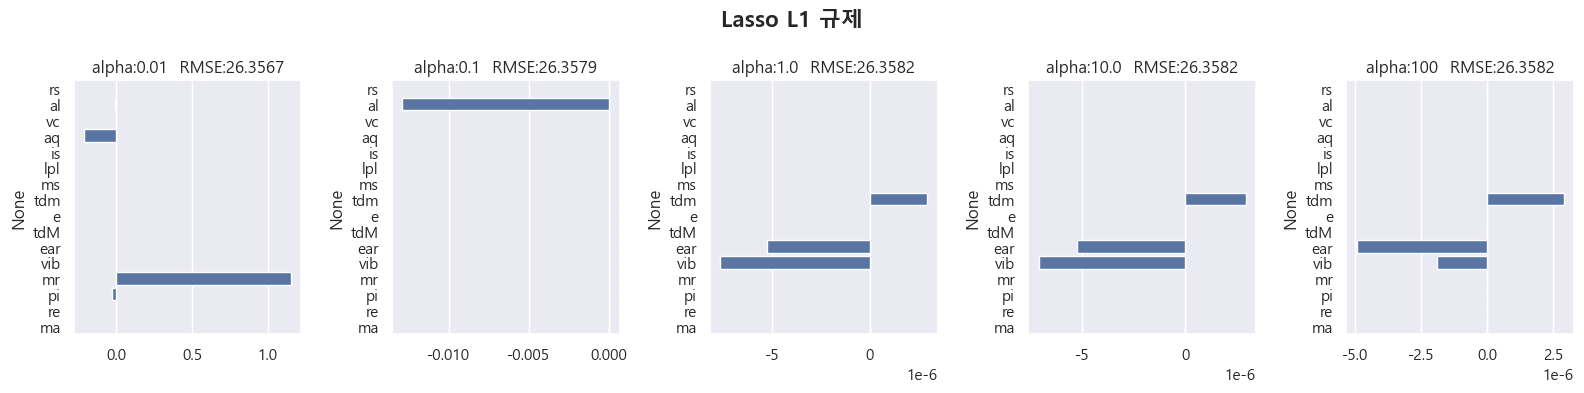

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(16,4))
for (i,ap) in enumerate([0.01, 0.1, 1.0, 10.0, 100]):
    model = Lasso(alpha=ap, random_state=7458)
    model.fit(X80, y80)
    pred = model.predict(X20)
    #print(f"{ap}  {model.coef_} ")
    rmse = root_mean_squared_error(y20, pred)
    sns.barplot(x=model.coef_, y=X.columns, ax=axes[i])
    axes[i].set_title(f"alpha:{ap}  RMSE:{rmse:.4f}")
    print(f"alpha:{ap}  RMSE:{rmse:.4f}")
fig.suptitle("Lasso L1 Í∑úÏ†ú", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

alpha:0.01  RMSE:26.3566
alpha:0.1  RMSE:26.3566
alpha:1.0  RMSE:26.3566
alpha:10.0  RMSE:26.3566
alpha:100  RMSE:26.3565


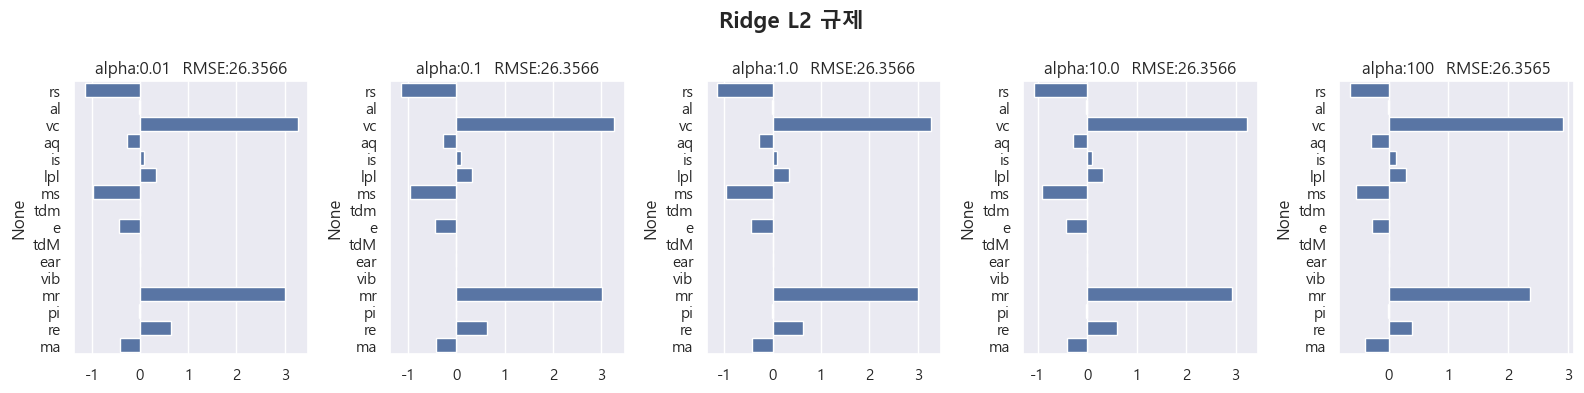

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(16,4))
for (i,ap) in enumerate([0.01, 0.1, 1.0, 10.0, 100]):
    model = Ridge(alpha=ap, random_state=7458)
    model.fit(X80, y80)
    pred = model.predict(X20)
    #print(f"{ap}  {model.coef_} ")
    rmse = root_mean_squared_error(y20, pred)
    sns.barplot(x=model.coef_, y=X.columns, ax=axes[i])
    axes[i].set_title(f"alpha:{ap}  RMSE:{rmse:.4f}")
    print(f"alpha:{ap}  RMSE:{rmse:.4f}")
fig.suptitle("Ridge L2 Í∑úÏ†ú", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=8989)

cv_model = GridSearchCV( Ridge(alpha=1.0, random_state=8989)
                        , param_grid={"alpha" : np.logspace(-3, 3, 7)}   #------Î™®Îç∏ÌäúÎãù 
                        , scoring="neg_root_mean_squared_error"
                        , cv=kf)             #------ÍµêÏ∞®Í≤ÄÏ¶ù
cv_model.fit(X, y)
print(cv_model)
best_param = cv_model.best_params_
print(best_param)

best_score = -1*cv_model.best_score_
print(f"{best_score:.4f}")  #  negÎäî ÏùåÏàòÎ•º ÎúªÌï®(ÏûëÏùÄ Í∞íÏùºÏàòÎ°ù Ï¢ãÎã§)

best_model = cv_model.best_estimator_
print(best_model)
coef = best_model.coef_

GridSearchCV(cv=KFold(n_splits=5, random_state=8989, shuffle=True),
             estimator=Ridge(random_state=8989),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='neg_root_mean_squared_error')
{'alpha': 100.0}
26.4020
Ridge(alpha=100.0, random_state=8989)


In [54]:
xgb = XGBRegressor(
    tree_method="gpu_hist",
    predictor="gpu_predictor",
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
)

lgb = LGBMRegressor(
    device="gpu",
    boosting_type="gbdt",
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
)

meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))


stack = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgb', lgb)
    ],
    final_estimator=meta_model,
    n_jobs=-1
)

param_grid = {
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.03, 0.05, 0.1],
    'lgb__learning_rate': [0.03, 0.05, 0.1],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=stack,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    verbose=2,
    n_jobs=-1
)

grid.fit(X80, y80)

print("‚úÖ Best Params:", grid.best_params_)
print("‚úÖ Best Score (RMSE):", -grid.best_score_)

best_model = grid.best_estimator_
pred = best_model.predict(X20)

rmse = mean_squared_error(y20, pred, squared=False)
r2 = r2_score(y20, pred)

print(f"Validation RMSE: {rmse:.4f}")
print(f"R¬≤ Score: {r2:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 